In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('raw_data/Production_LivestockPrimary_E_All_Data/Production_LivestockPrimary_E_All_Data.csv', sep = ',', encoding = 'latin-1')
data.shape

(22315, 121)

In [5]:
data[data['Element'] == 'Prod Popultn']

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2013,Y2013F,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F
58,2,Afghanistan,987,"Wool, greasy",5319,Prod Popultn,Head,18000000.0,F,18150000.0,...,13141000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,4,Algeria,1182,"Honey, natural",5314,Prod Popultn,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
529,9,Argentina,987,"Wool, greasy",5319,Prod Popultn,Head,50150000.0,NaN,47305408.0,...,10616300.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
698,10,Australia,987,"Wool, greasy",5319,Prod Popultn,Head,157000000.0,F,164000000.0,...,81750000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1107,16,Bangladesh,987,"Wool, greasy",5319,Prod Popultn,Head,600000.0,F,650000.0,...,1900000.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22009,5815,Low Income Food Deficit Countries,1182,"Honey, natural",5314,Prod Popultn,No,7492300.0,A,7492300.0,...,12154000.0,A,12357500.0,A,12538236.0,A,13026913.0,A,13321703.0,A
22125,5815,Low Income Food Deficit Countries,987,"Wool, greasy",5319,Prod Popultn,Head,24468000.0,A,25018000.0,...,49940000.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22147,5817,Net Food Importing Developing Countries,1183,Beeswax,5314,Prod Popultn,No,2453000.0,A,2453000.0,...,386000.0,A,387500.0,A,389093.0,A,403657.0,A,400019.0,A
22165,5817,Net Food Importing Developing Countries,1182,"Honey, natural",5314,Prod Popultn,No,2492300.0,A,2492300.0,...,611045.0,A,611898.0,A,611081.0,A,619539.0,A,613845.0,A


## Explanations of data files
Each row of the livestock dataset contains data on all years available, on a given metadata.  
There are 7 columns of metadata, which can be seen below, and the rest of the columns are data for each year.  
The years usually span from 1961 to 2017, but some years are missing.  

| Column name         | Explanation|
|------------------------|--------|
| Area                   |Name of country/area|
| Area Code              |Unique code for each country/area|
| Item                   |Type of product, e.g "Eggs, hen, in shell"|
| Item Code              |Unique code for each Item|
| Element                |Type data, e.g. Production, Yield, Milk Animals |
| Unit                   |The unit of the measurement of the element, in total 9 different units |
| Element Code           |Unique code based on pairs of Element and Unit|


For each year there is also a column with the year + F, which signifies the meaning of the data.  

|  Flag  | Meaning of flag        |
|--------|------------------------|
| *      | Unofficial data        |
| F      | FAO Estimate           |
| NaN    | Official data          |
| Fc     | Calculated data        |
| A      | Aggregate, may include official, semi-official, estimated or calculated data |
| M      | Data not available     | 
| Im     |FAO data based on imputation methodology |



## Units - REWRITE THIS
Producing Animals/Slaughtered: Laying in 1000 heads; Milk Animals in heads; Prod Population (Beehives) in number; Prod Population (Slaughtered animals) in heads.  
Production Quantity: Eggs in tonnes and in number; Meat and milk in tonnes; Wool and Hides and Skins in tonnes; Honey and Beeswax in tonnes.  
Yield: 100 milligrams per animal; number per animal; hectograms per animal; hectograms.  
Yield/Carcass Weight: 0.1 grams per animal (poultry); hectograms per animal (other animals).

## Elements
|  Element             | Description            |
|----------------------|------------------------|
| Laying               | Birds raised for laying eggs        |
| Yield                | How much of the animal which is used           |
| Production           | How much is produced          |
| Producing Animals/Slaughtered    | How many animals that are being produced for meat        |
| Yield/Carcass Weight | Same as yield, but also taking account size of animal |
| Milk Animals         | How many animals used for milk production     | 
| Prod Popultn         | Population of a given item  |


### LOOK AT THIS
**Maybe we should shoud split dataset into country-based and area-based. Also, there might be a better way to clean the data**  
_We wish to separate our dataset into country-based and area-based. Here we start by removing all areas._

In [59]:
#data[(data['Area'] == 'Finland')]

#Drop all the Areas that are not countries. 
data.drop(data[data['Area'].isin(['European Union', \
       'Least Developed Countries', 'Land Locked Developing Countries', \
       'Small Island Developing States', \
       'Low Income Food Deficit Countries', \
       'Net Food Importing Developing Countries', 'World', 'Africa', \
       'Eastern Africa', 'Middle Africa', 'Northern Africa',\
       'Southern Africa', 'Western Africa', 'Americas',\
       'Northern America', 'Central America', 'Caribbean',\
       'South America', 'Asia', 'Central Asia', 'Eastern Asia',\
       'Southern Asia', 'South-Eastern Asia', 'Western Asia', 'Europe',\
       'Eastern Europe', 'Northern Europe', 'Southern Europe',\
       'Western Europe', 'Oceania', 'Australia and New Zealand',\
       'Melanesia', 'Micronesia', 'Polynesia'])].index, axis=0, inplace=True)
data.Area.unique()


array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize',
       'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'China, mainland', 'China, Taiwan Province of', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibo

## Questions
1. How has the crops/livestock primary production developed since 1960?
1. Is there a connection between the development of livestock primary production and crop production?
1. How are the differences in production quantities between the different continents?
1. How has the development in agriculture affected emission of greenhouse gasses?

The unique units: ['1000 Head' '100mg/An' 'tonnes' '1000 No' 'Head' 'hg/An' '0.1g/An' 'hg'
 'No']
We have data from 1961 to 2017


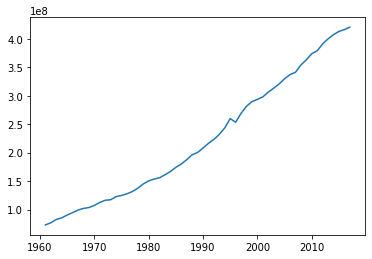

420290203.0
Plot made with data from following meat types: ['Meat, camel' 'Meat, cattle' 'Meat, chicken' 'Meat, goat' 'Meat, sheep'
 'Meat, nes' 'Meat, pig' 'Meat, horse' 'Meat, rabbit' 'Meat, turkey'
 'Meat, duck' 'Meat, goose and guinea fowl' 'Meat, buffalo'
 'Meat, other camelids' 'Meat, other rodents' 'Meat, ass' 'Meat, bird nes'
 'Meat, mule']


,Y1961
Item,
"Meat, cattle",27743924.0
"Meat, pig",26355198.0
"Meat, chicken",8043004.0
"Meat, sheep",4985310.0
"Meat, goat",1147277.0
"Meat, buffalo",1091199.0
"Meat, turkey",900676.0
"Meat, nes",891179.0
"Meat, horse",581169.0


In [79]:
# As you can see, each item maps 1-1 to an item code
# print(data.groupby(['Item']).agg({'Item Code':'unique'}).to_string())
# In the Element - Element Code relationship however, There's a 1 - many relationsship
data.groupby(['Element']).agg({'Element Code':'unique'})

# 1-1 relationship between Area and Area Code 
# print(data.groupby(['Area']).agg({'Area Code':'unique'}).to_string())
print('The unique units: {}'.format(data['Unit'].unique()))
# print(data.isna().sum().to_string())
# We have a lot of NaN values in each year
print('We have data from {} to {}'.format(data.columns[7:][0][1:],data.columns[7:][-1][1:-1]))
len(data['Area'].unique())
# How do we visualize the data when it is in so many different formats, units, animals etc
# We want to know delevopment in crop/livestock production worldwide 1960 - today
# How do we handle the different Flags?
# Somehow aggregate the units? Make sure we have aggregate unique data and don't count something twice

# One solution to all of the problems/questions above can be solved like this:
# Only take data with 'tonnes' as unit, remove 'indigenous' items and only keep 
# items containing Meat
meat_data = data[(data['Unit'] == 'tonnes') & np.logical_not(data['Item'].str.contains('indigenous'))\
     & data['Item'].str.contains('Meat') & \
    np.logical_not(data['Item'].str.contains('Total') | data['Item'].str.contains('game') \
     | data['Item'].str.contains('Beef and Buffalo Meat') | data['Item'].str.contains('Meat, Poultry') \
     | data['Item'].str.contains('Sheep and Goat Meat'))]
# Sum all of the meat production for each year 1961-2017
sum_prod = []
for year in range(1961,2018):
    sum_prod.append(meat_data.aggregate({'Y'+str(year):'sum'})[0])
plt.plot(pd.DataFrame(sum_prod, index=range(1961,2018)))
plt.show()
print(sum_prod[-1])
print('Plot made with data from following meat types: {}'.format(meat_data.Item.unique()))
meat_data.groupby('Item').agg({'Y1961':'sum'}).sort_values(by=['Y1961'], ascending=False)

#### Regarding the above plot
We can see that the meat production steadily increases until about 2010 when there's a sharp drop, probably due to some data change. The plot says that the meat production started at 25 billion tonnes 1961, and raised to 75 billion tones in 2010. This seems way to much, we probably simplified the summation of the data and need to look into it further.


### Challenges
- How do we visualize the data when it is in so many different formats, units, animals etc
- We want to know delevopment in crop/livestock production worldwide 1960 - today
- How do we handle the different Flags?
- Somehow aggregate the units? Make sure we have aggregate unique data and don't count something twice
